# Setting

## pip install

In [ ]:
!pip install transformers
!pip install faiss-cpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.0/27.0 MB 73.4 MB/s eta 0:00:00


In [ ]:
!pip install peft seqeval bitsandbytes evaluate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.5/322.5 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.4/122.4 MB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 33.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 20.0 MB/s eta 0:00:00
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16161 sha256=fe543946abe8b57bfa3f6b9bf6da46da5419c59d770d6ec2873ea2e6361e8b60
  Stored in dir

In [ ]:
!pip install -U bitsandbytes

In [ ]:
!pip install accelerate

In [ ]:
!pip install datasets

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Wed Oct  2 09:57:14 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 54.8 gigabytes of available RAM

You are using a high-RAM runtime!


In [ ]:
# !pip install kaggle

In [ ]:
from google.colab import files
files.upload()

{}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d nelgiriyewithana/emotions

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/nelgiriyewithana/emotions
License(s): other
emotions.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
from zipfile import ZipFile
file_name = 'emotions.zip'
with ZipFile(file_name, 'r') as zip:
  zip.extractall('/content')
  print('Done')

Done


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt
import seaborn as sns

# Data Cleansing

1. 데이터 확인
2. 데이터 전처리
3. train_test_split

2. 텍스트 전처리
3. 토크나이즈
4. 데이터 정리
5. 레이블 인코딩 확인

In [ ]:
text = pd.read_csv('/content/text.csv', index_col = 0)

text.head(3)

,text,label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4


In [ ]:
print(f'shape: {text.shape}')
print('\n')
print(f'isnull: \n{text.isnull().sum()}')
print('\n')
print(f'duplicated: {text.duplicated().sum()}')

shape: (416809, 2)


isnull: 
text     0
label    0
dtype: int64


duplicated: 686


Six categories: sadness (0), joy (1), love (2), anger (3), fear (4), and surprise (5).

In [ ]:
text.drop_duplicates(ignore_index = True, inplace = True)
text.duplicated().sum()

0

In [ ]:
emotions = {0: 'sadeness', 1: 'joy', 2: 'love', 3: 'anger', 4: 'fear', 5: 'surprise'}

text['emotion'] = text['label'].replace(emotions)

text.head()

,text,label,emotion
0,i just feel really helpless and heavy hearted,4,fear
1,ive enjoyed being able to slouch about relax a...,0,sadeness
2,i gave up my internship with the dmrg and am f...,4,fear
3,i dont know i feel so lost,0,sadeness
4,i am a kindergarten teacher and i am thoroughl...,4,fear


In [ ]:
html_rgb = {0: '#2C3E50', 1: '#FFCC00', 2: '#FFC0CB', 3: '#FF0000', 4: '#00008B', 5: '#FFFF00'}

text['rgb'] = text['label'].replace(html_rgb)

In [ ]:
text.tail()

,text,label,emotion,rgb
416118,i feel like telling these horny devils to find...,2,love,#FFC0CB
416119,i began to realize that when i was feeling agi...,3,anger,#FF0000
416120,i feel very curious be why previous early dawn...,5,surprise,#FFFF00
416121,i feel that becuase of the tyranical nature of...,3,anger,#FF0000
416122,i think that after i had spent some time inves...,5,surprise,#FFFF00


In [ ]:
count = text['emotion'].value_counts()

<ipython-input-27-a9bca15f5680>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=count.index, y=count.values, ax=axs, palette="viridis")
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a 

Text(0.5, 1.0, 'Count of Categories')

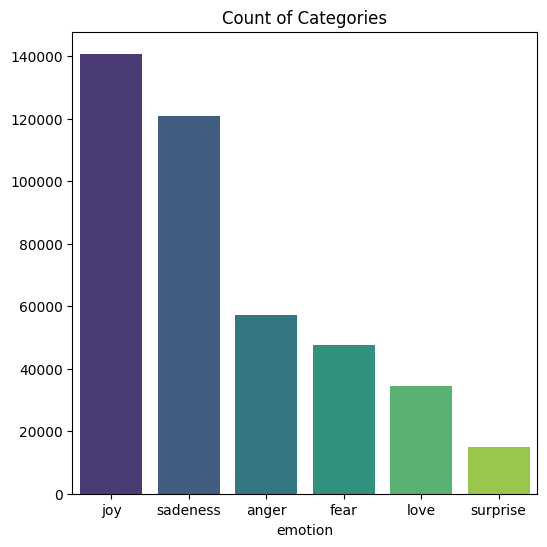

In [ ]:
fig, axs = plt.subplots(figsize = (6, 6), facecolor='white')
palette = sns.color_palette("viridis")
sns.set_palette(palette)

sns.barplot(x=count.index, y=count.values, ax=axs, palette="viridis")
axs.set_title('Count of Categories')

### **imbalanced class**

1) SMOTE

2) Class Weighting

3) Stratified Sampling

4) Ensemble Methods
* Balanced Random Forest: Uses undersampling in each bootstrap sample.
* EasyEnsemble: Trains multiple models on undersampled data and averages their predictions.

5) Focal Loss

----------------------
### Which Method to Choose?
* **Small Imbalance**: Class weighting or simple oversampling/undersampling may suffice.
* **Severe Imbalance**: SMOTE, class weights, or focal loss should be considered.
* **Large Dataset**: Stratified sampling or ensemble methods could work well.
Each method comes with trade-offs, so it’s essential to evaluate performance on a validation set or using cross-validation.



In [ ]:
text['label'].value_counts()

,count
label,
1,140779
0,120989
3,57235
4,47664
2,34497
5,14959


In [ ]:
text.shape

(416123, 4)

In [ ]:
text_idx = text.reset_index()

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

X = text_idx[['index']]
y = text_idx['label']

rus = RandomUnderSampler()
X_resampled, y_resampled = rus.fit_resample(X, y)

In [ ]:
resampled_df = pd.DataFrame({'index':X_resampled['index'].to_numpy().flatten(), 'label':y_resampled})

In [ ]:
resampled_df['label'].value_counts()

,count
label,
0,14959
1,14959
2,14959
3,14959
4,14959
5,14959


In [ ]:
print("변경 전 shape:", text.shape, "\n""변경 후 shape:", resampled_df.shape)

변경 전 shape: (416123, 4) 
변경 후 shape: (89754, 2)


In [ ]:
df = resampled_df.merge(text_idx[['index', 'text', 'emotion', 'label']], on = ['index', 'label'], how = 'left')

In [ ]:
df.drop(columns = 'index', inplace = True)
df.dropna(subset=['text'], how='any', axis=0, inplace = True)

In [ ]:
df.shape

(89754, 3)

In [ ]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size = 0.1, random_state = 111, stratify=df['label'])

train_df.to_csv('train_data.csv', index = False)
test_df.to_csv('test_data.csv', index = False)

In [ ]:
train_df['label'].value_counts()

,count
label,
1,13463
3,13463
0,13463
2,13463
4,13463
5,13463


In [ ]:
test_df['label'].value_counts()

,count
label,
1,1496
3,1496
0,1496
5,1496
4,1496
2,1496


In [ ]:
import transformers; transformers.__version__

'4.44.2'

In [ ]:
try:
    import accelerate
except Exception as e:
    !pip install -q -U transformers
    !pip install -q datasets accelerate
    !pip install -q lomo-optim

# Model Finetuning

In [ ]:
from huggingface_hub import notebook_login
notebook_login()

## Modeling(model, tokenizer, lora finetuning)

In [ ]:
from datasets import load_dataset
from transformers import (
    AutoModelForTokenClassification,
    AutoModelForSequenceClassification,
    AutoTokenizer,
    DataCollatorForTokenClassification,
    TrainingArguments,
    Trainer,
)
from peft import get_peft_config, PeftModel, PeftConfig, get_peft_model, LoraConfig, TaskType
import evaluate
import torch
import numpy as np
import bitsandbytes as bnb

In [ ]:
seqeval = evaluate.load("seqeval")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
tokenizer = AutoTokenizer.from_pretrained("google/gemma-2-2b-it")

tokenizer_config.json:   0%|          | 0.00/47.0k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/4.24M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.5M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/636 [00:00<?, ?B/s]

In [ ]:
id2label = {0: 'sadness', 1: 'joy', 2: 'love', 3: 'anger', 4: 'fear', 5: 'surprise'}
label2id = {'sadness': 0, 'joy': 1, 'love': 2, 'anger': 3, 'fear': 4, 'surprise': 5}

model = AutoModelForSequenceClassification.from_pretrained(
    "google/gemma-2-2b-it", num_labels=6, id2label=id2label, label2id=label2id, device_map="auto"
)  #,load_in_4bit=True 양자화 설정

# AutoModelForTokenClassification: 단어 단위로 토크나이즈 할 때
# AutoModelForSequenceClassification: 문장(시퀀스) 단위로 토크나이즈 할 때

config.json:   0%|          | 0.00/838 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/24.2k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/241M [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Some weights of Gemma2ForSequenceClassification were not initialized from the model checkpoint at google/gemma-2-2b-it and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# 단어 단위로 토크나이즈 하는 경우 사용
# from transformers import DataCollatorForTokenClassification

# data_collator = DataCollatorForTokenClassification(tokenizer=tokenizer)

# 문장 단위로 토크나이즈 하는 경우
from transformers import DataCollatorWithPadding

# 시퀀스 분류
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [ ]:
# Token 단위인 경우
# peft_config = LoraConfig(
#     task_type=TaskType.TOKEN_CLS, target_modules=["self_attn.q_proj", "self_attn.k_proj", "self_attn.v_proj", "self_attn.o_proj"], inference_mode=False, r=16, lora_alpha=16, lora_dropout=0.1, bias="all"
# )

In [ ]:
# Sequance인 경우 LORA 설정 적용
peft_config = LoraConfig(
    task_type=TaskType.SEQ_CLS,  # 시퀀스 분류에 맞게 TaskType 변경
    target_modules=["self_attn.q_proj", "self_attn.k_proj", "self_attn.v_proj", "self_attn.o_proj"],
    inference_mode=False,
    r=16,
    lora_alpha=16,
    lora_dropout=0.1,
    bias="all"
)

In [ ]:
model = get_peft_model(model, peft_config)
model.print_trainable_parameters()

trainable params: 6,403,584 || all params: 2,620,759,296 || trainable%: 0.2443


### dataset transform

In [ ]:
train_texts = train_df['text'].tolist()
train_labels = train_df['label'].tolist()
test_texts = test_df['text'].tolist()
test_labels = test_df['label'].tolist()

In [ ]:
train_encodings = tokenizer(train_texts, truncation=True, padding=True)
test_encodings = tokenizer(test_texts, truncation=True, padding=True)

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


In [ ]:
#hugging face dataset으로 변환
train_dataset = Dataset.from_dict({
    'input_ids': train_encodings['input_ids'],
    'attention_mask': train_encodings['attention_mask'],
    'labels': train_labels
})

test_dataset = Dataset.from_dict({
    'input_ids': test_encodings['input_ids'],
    'attention_mask': test_encodings['attention_mask'],
    'labels': test_labels
})

In [ ]:
# 토큰 단위로 사용할 때, mapping 추가
# train_dataset = train_dataset.map(lambda examples: {'labels': [examples['labels']]})
# test_dataset = test_dataset.map(lambda examples: {'labels': [examples['labels']]})

In [ ]:
train_dataset["labels"][:1]

[1]

In [ ]:
!nvidia-smi

Wed Oct  2 10:08:01 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P0              27W /  70W |  10231MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

### Data sampling

In [ ]:
train_dataset.info

DatasetInfo(description='', citation='', homepage='', license='', features={'input_ids': Sequence(feature=Value(dtype='int32', id=None), length=-1, id=None), 'attention_mask': Sequence(feature=Value(dtype='int8', id=None), length=-1, id=None), 'labels': Value(dtype='int64', id=None)}, post_processed=None, supervised_keys=None, builder_name=None, dataset_name=None, config_name=None, version=None, splits=None, download_checksums=None, download_size=None, post_processing_size=None, dataset_size=None, size_in_bytes=None)

In [ ]:
import random

# 전체 데이터셋의 20% 인덱스 샘플링
train_total_size = len(train_dataset)
train_sample_size = int(train_total_size * 0.2)
train_random_indices = random.sample(range(train_total_size), train_sample_size)

# 20% 샘플링된 데이터셋 생성
sampled_train_dataset = train_dataset.select(train_random_indices)

test_total_size = len(test_dataset)
test_sample_size = int(test_total_size * 0.2)
test_random_indices = random.sample(range(test_total_size), test_sample_size)

# 20% 샘플링된 데이터셋 생성
sampled_test_dataset = test_dataset.select(test_random_indices)

In [ ]:
# train_sample = train_dataset.sample(frac=0.1)
# test_sample = train_dataset.sample(frac=0.1)

### 평가하기

In [ ]:
# 토큰 단위로 쓰는 경우 평가지표
# def compute_metrics(p):
#     predictions = p.predictions.argmax(-1)  # 예측값을 클래스 예측으로 변환
#     labels = p.label_ids
#     # -100으로 마스킹된 레이블 무시
#     valid_labels = labels[labels != -100]
#     valid_preds = predictions[labels != -100]
#     return {"accuracy": (valid_preds == valid_labels).mean()}

# 시퀀스 단위로 사용하는 경우 평가지표
def compute_metrics(p):
    predictions = p.predictions.argmax(-1)  # 시퀀스 레벨 예측
    labels = p.label_ids
    return {"accuracy": (predictions == labels).mean()}  # 전체 문장 단위 정확도

### Model training

In [ ]:
training_args = TrainingArguments(
    output_dir="result",
    learning_rate=2e-5, #2e-5
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    num_train_epochs=3,
    weight_decay=0.01,
    eval_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    push_to_hub=False,
    fp16=False,  # float16 비활성화
    bf16=False,  # bf16 비활성화
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

print(f"train data set shape: {train_dataset.shape}")
print(f"test data set shape: {test_dataset.shape}")

trainer.train()

train data set shape: (80778, 3)
test data set shape: (8976, 3)


Epoch,Training Loss,Validation Loss


In [ ]:
trainer.evaluate()

{'eval_loss': nan,
 'eval_accuracy': 0.16666666666666666,
 'eval_runtime': 1638.016,
 'eval_samples_per_second': 5.48,
 'eval_steps_per_second': 5.48,
 'epoch': 1.0}

### save model(push hub)

In [ ]:
trainer.push_to_hub("Quiett/PaperPrism_gemma2_2b_it")

adapter_model.safetensors:   0%|          | 0.00/25.6M [00:00<?, ?B/s]

Upload 24 LFS files:   0%|          | 0/24 [00:00<?, ?it/s]

adapter_model.safetensors:   0%|          | 0.00/25.6M [00:00<?, ?B/s]

training_args.bin:   0%|          | 0.00/5.18k [00:00<?, ?B/s]

adapter_model.safetensors:   0%|          | 0.00/2.53M [00:00<?, ?B/s]

adapter_model.safetensors:   0%|          | 0.00/25.6M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.5M [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/4.24M [00:00<?, ?B/s]

training_args.bin:   0%|          | 0.00/5.18k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.5M [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/4.24M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.5M [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/4.24M [00:00<?, ?B/s]

events.out.tfevents.1727490254.8b3d4617599b.5221.0:   0%|          | 0.00/17.1k [00:00<?, ?B/s]

events.out.tfevents.1727492636.8b3d4617599b.17808.0:   0%|          | 0.00/17.1k [00:00<?, ?B/s]

events.out.tfevents.1727493643.8b3d4617599b.17808.1:   0%|          | 0.00/17.1k [00:00<?, ?B/s]

events.out.tfevents.1727497057.8b3d4617599b.17808.2:   0%|          | 0.00/5.33k [00:00<?, ?B/s]

events.out.tfevents.1727497081.8b3d4617599b.17808.3:   0%|          | 0.00/5.38k [00:00<?, ?B/s]

events.out.tfevents.1727497115.8b3d4617599b.17808.4:   0%|          | 0.00/5.38k [00:00<?, ?B/s]

events.out.tfevents.1727497237.8b3d4617599b.17808.5:   0%|          | 0.00/4.18k [00:00<?, ?B/s]

events.out.tfevents.1727497363.8b3d4617599b.39049.0:   0%|          | 0.00/40.5k [00:00<?, ?B/s]

events.out.tfevents.1727528717.8b3d4617599b.39049.1:   0%|          | 0.00/417 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.5M [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/4.24M [00:00<?, ?B/s]

training_args.bin:   0%|          | 0.00/5.18k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/Quiett/result/commit/ebf28b11a0e798d89d8123f928a52074d1e0f471', commit_message='Quiett/PaperPrism_gemma2_2b', commit_description='', oid='ebf28b11a0e798d89d8123f928a52074d1e0f471', pr_url=None, pr_revision=None, pr_num=None)

In [ ]:
# #모델 불러오기
# model_test = AutoModelForSequenceClassification.from_pretrained("Quiett/PaperPrism_gemma2_2b")